In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harunshimanto/epileptic-seizure-recognition")

print("Path to dataset files:", path)

100%|██████████| 2.77M/2.77M [00:00<00:00, 78.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2


In [ ]:
import os

# Root directory of the dataset
root_dir = "/root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2"

# List all files and directories
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(f"📁 Folder: {dirpath}")
    for file in filenames:
        print(f"   📄 {file}")


📁 Folder: /root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2
   📄 Epileptic Seizure Recognition.csv


In [ ]:
import pandas as pd

# Correct path to the CSV file
path = "/root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2/Epileptic Seizure Recognition.csv"

# Load the dataset
df = pd.read_csv(path)

# Preview the data
df.head()


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Drop the unnamed column (index column)
df = df.drop(columns=['Unnamed'])

# Step 2: Separate features and target
X = df.drop(columns=['y']).values
y = df['y'].values

# Step 3: Binary classification – convert class 1 as seizure, others as non-seizure
y_binary = np.where(y == 1, 1, 0)

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

print(f"✅ Data shape: {X_train.shape}, {X_test.shape}")
print(f"✅ Seizure cases in training: {np.sum(y_train == 1)} / {len(y_train)}")
print(f"✅ Seizure cases in testing: {np.sum(y_test == 1)} / {len(y_test)}")


✅ Data shape: (9200, 178), (2300, 178)
✅ Seizure cases in training: 1840 / 9200
✅ Seizure cases in testing: 460 / 2300


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input for Conv1D (samples, timesteps, channels)
X_train_reshaped = X_train.reshape(-1, 178, 1)
X_test_reshaped = X_test.reshape(-1, 178, 1)

# Build the model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(178, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=20,
    batch_size=64
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 178, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 89, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,097 (516.00 KB)

 Trainable params: 132,097 (516.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.9099 - loss: 0.2925 - val_accuracy: 0.9557 - val_loss: 0.0993
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.9592 - loss: 0.1096 - val_accuracy: 0.9600 - val_loss: 0.0829
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9635 - loss: 0.0860 - val_accuracy: 0.9683 - val_loss: 0.0779
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9657 - loss: 0.0828 - val_accuracy: 0.9657 - val_loss: 0.0886
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.9699 - loss: 0.0753 - val_accuracy: 0.9774 - val_loss: 0.0627
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9766 - loss: 0.0664 - val_accuracy: 0.9765 - val_loss: 0.0578
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9792 - loss: 0.0586 - val_accuracy: 0.9730 - val_loss: 0.0749
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9793 - loss: 0

In [ ]:
print("Input shape before prediction:", X.shape)


Input shape before prediction: (11500, 178)


In [ ]:
print("Input shape before prediction:", X.shape)
print("Sample data (first row):", X[0])


Input shape before prediction: (11500, 178)
Sample data (first row): [ 135  190  229  223  192  125   55   -9  -33  -38  -10   35   64  113
  152  164  127   50  -47 -121 -138 -125 -101  -50   11   39   24   48
   64   46   13  -19  -61  -96 -130 -132 -116 -115  -71  -14   25   19
    6    9   21   13  -37  -58  -33    5   47   80  101   88   73   69
   41  -13  -31  -61  -80  -77  -66  -43    5   87  129  121   88   12
  -76 -150 -207 -186 -165 -148 -103  -33   40   94   75    8  -81 -155
 -227 -262 -233 -218 -187 -126  -65  -12   27   61   49    9  -46 -124
 -210 -281 -265 -181  -89   -4   53   53   38   43   31   34    9   -7
  -34  -70  -84 -101  -70  -11   42   62   66   74   64   59   56   36
  -11  -30  -43  -23    8   42   77  103  135  121   79   59   43   54
   90  111  107   64   32   18  -25  -69  -65  -44  -33  -57  -88 -114
 -130 -114  -83  -53  -79  -72  -85 -109  -98  -72  -65  -63  -11   10
    8  -17  -15  -31  -77 -103 -127 -116  -83  -51]


In [ ]:
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9836 - loss: 0.0493
Test Accuracy: 98.61%


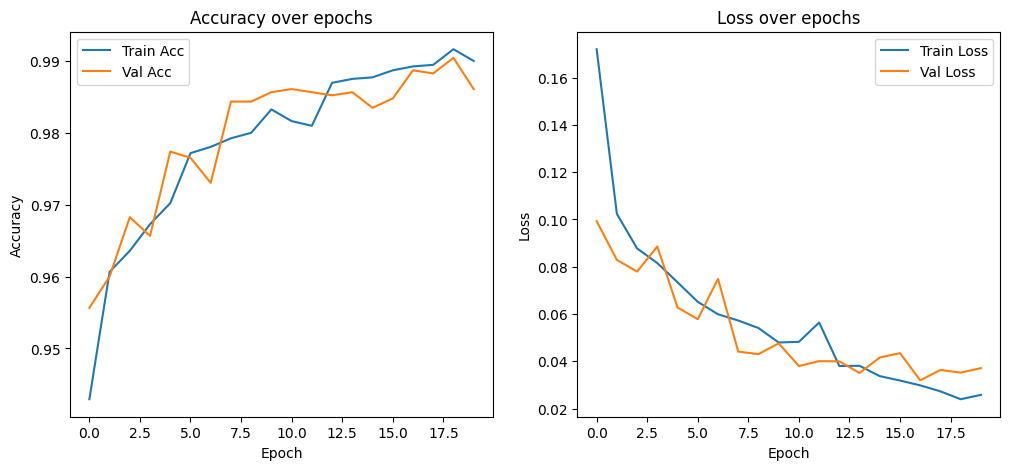

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save('cnn_bilstm_epilepsy_model.h5')


In [ ]:
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1840
           1       0.96      0.97      0.97       460

    accuracy                           0.99      2300
   macro avg       0.98      0.98      0.98      2300
weighted avg       0.99      0.99      0.99      2300

[[1822   18]
 [  14  446]]


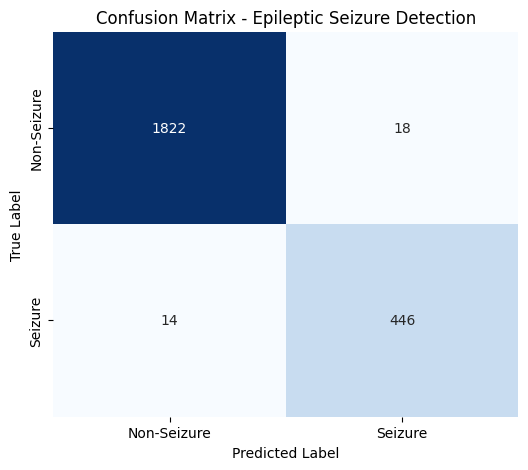

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Seizure','Seizure'], yticklabels=['Non-Seizure','Seizure'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Epileptic Seizure Detection')
plt.show()
